In [1]:
import numpy as np
import DDM_util as util
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
%matplotlib inline

In [2]:
sigma_val = 0.005
sigma_val_filename = '005'
num_individuals = 4

In [3]:
def test_oneleader_network(L, graph_name):
    x0 = np.zeros([num_individuals, 1])
    leader_indices = [1]
    leader_betas = [1]
    beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
    sigma = np.ones([num_individuals, 1]) * sigma_val
    dt = 0.001
    T = 10
    plt.figure(0)
    x = util.run_simulation(x0, beta, L, dt, sigma, T, title=r"{0} graph, leader at index 1, $\beta_1=1$".format(graph_name))
    plt.figure(1)
    util.plot_discrepancy(x, [1], L, T)
    return x

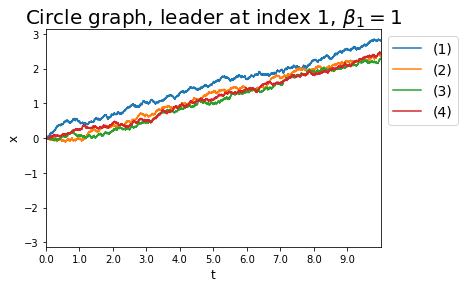

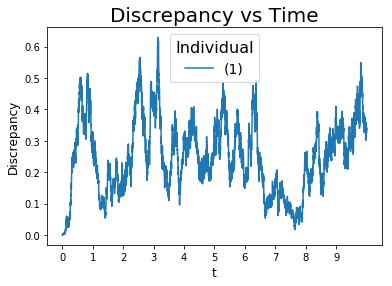

Total final discrepancy: 0.34
Final discrepancy: [ 0.3365226]


In [4]:
L_circle = util.create_circle_graph(num_individuals)
x_circle = test_oneleader_network(L_circle, "Circle")

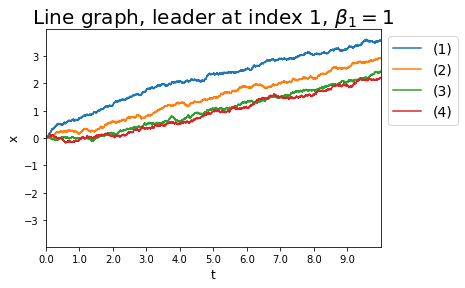

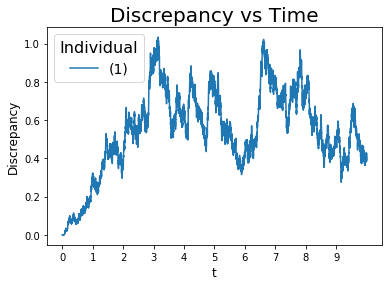

Total final discrepancy: 0.39
Final discrepancy: [ 0.38674723]


In [5]:
L_line = util.create_line_graph(num_individuals)
x_line = test_oneleader_network(L_line, "Line")

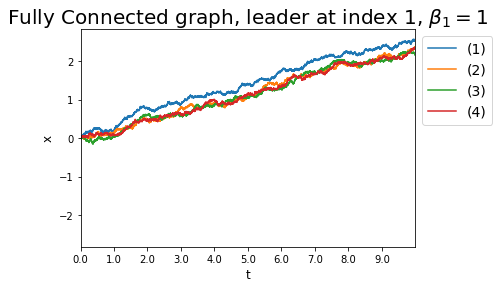

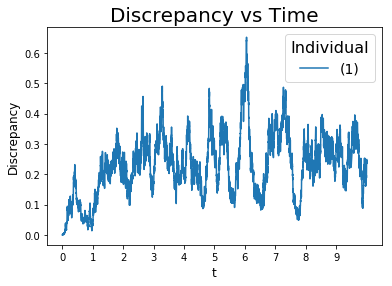

Total final discrepancy: 0.25
Final discrepancy: [ 0.24838098]


In [6]:
L_fc = util.create_fullyconnected_graph(num_individuals)
x_fc = test_oneleader_network(L_fc, "Fully Connected")

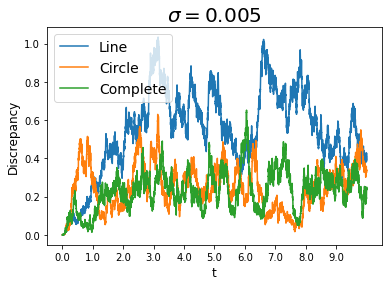

In [7]:
axis_fontsize = 12
title_fontsize = 20
legendtitle_fontsize = 16
legendlabel_fontsize = 14

center = 1
T = 10
dt = 0.001
num_timesteps = int(T/dt)
xtick_spacing = int(num_timesteps / 10)

def plot_x(x, label, L):
    plt.plot([util.compute_discrepancy(x[:,t], center-1, L) for t in range(x.shape[1])], label=label)
plot_x(x_line, "Line", L_line)
plot_x(x_circle, "Circle", L_circle)
plot_x(x_fc, "Complete", L_fc)
legend = plt.legend(fontsize=legendlabel_fontsize)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
t_vals = np.arange(0, T, 1)
plt.xticks(range(0, x_fc.shape[1], int(x_fc.shape[1] / T)), t_vals)
plt.xlabel("t", fontsize=axis_fontsize)
plt.ylabel("Discrepancy", fontsize=axis_fontsize)
plt.title(r"$\sigma=%.3f$" % sigma_val, fontsize=title_fontsize)
t_vals = np.arange(0, T, xtick_spacing * dt)
plt.xticks(range(0, num_timesteps, xtick_spacing), t_vals)
plt.savefig("../Figures/oneleader_graphstructure_noise%s_connected" % sigma_val_filename, bbox_inches="tight")
plt.show()
